In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed = np.random.seed(0)


In [2]:
train_data_apartments = pd.read_csv("data/apartments_train.csv")
train_data_buildings = pd.read_csv("data/buildings_train.csv")

train_data = pd.merge(train_data_apartments, train_data_buildings.set_index('id'), how='left', left_on='building_id', right_index=True)
num_of_training_samples = train_data.shape[0]


y_train = (np.asarray(train_data.price))



train_data = train_data.drop("price", axis = 1)


test_data_apartments = pd.read_csv("data/apartments_test.csv")
test_data_buildings = pd.read_csv("data/buildings_test.csv")

test_data = pd.merge(test_data_apartments, test_data_buildings.set_index('id'), how='left', left_on='building_id', right_index=True)
test_ids = test_data.id

all_data = pd.concat([train_data, test_data])





In [3]:
def euclid_dist_from_center(lat, long):
    lat_city_center = 55.75
    long_city_center = 37.6

    return np.sqrt(np.power(np.abs(lat_city_center - lat), 2) + np.power(np.abs(long_city_center - long), 2))

In [4]:
# combining street and address to identify builidngs
#print(len(all_data.loc[(all_data.ceiling > 7) & (all_data.ceiling < 25)])) # weirdly out of scale ceilings
all_data.ceiling[all_data.ceiling > 200] = all_data.ceiling/100
all_data.ceiling[(all_data.ceiling > 25) & (all_data.ceiling < 200)] = all_data.ceiling/10




C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
all_data["street_and_address"] = all_data.street + " " + all_data.address
all_data["bathrooms"] = all_data.bathrooms_shared  + all_data.bathrooms_private
all_data["dist_from_city_center"] = euclid_dist_from_center(all_data.latitude, all_data.longitude)
#plt.scatter(np.log(y_train), all_data.dist_from_city_center[0:23285], s = 0.1)
all_data["balconies_and_loggias"] = all_data.balconies + all_data.loggias
all_data["no_windows"] = (~((np.asarray(all_data.windows_court)==1) | (np.asarray(all_data.windows_street)==1))).astype(int)

#print(all_data[all_data.dist_from_city_center > 1])

#Бунинские Луга ЖК к2/2/1 = Ulitsa Aleksandry Monakhovoy, 97, coordinates: 55.5415152,37.4821752
# улица 1-я Линия 57, coordinates: 55.6324711, 37.4536057
#улица Центральная 75 and 48, ESTIMATED coordinates: 55.750651,37.6083208

all_data.latitude[all_data.street_and_address == "Бунинские Луга ЖК к2/2/1"] = 55.5415152
all_data.longitude[all_data.street_and_address == "Бунинские Луга ЖК к2/2/1"] = 37.4821752
all_data.latitude[all_data.street_and_address == "Бунинские Луга ЖК к2/2/2"] = 55.5415152
all_data.longitude[all_data.street_and_address == "Бунинские Луга ЖК к2/2/2"] = 37.4821752
all_data.latitude[all_data.street_and_address == "улица 1-я Линия 57"] = 55.6324711
all_data.longitude[all_data.street_and_address == "улица 1-я Линия 57"] = 37.4536057
all_data.latitude[all_data.street_and_address == "улица Центральная 75"] = 55.5415152
all_data.longitude[all_data.street_and_address == "улица Центральная 75"] = 37.4821752
all_data.latitude[all_data.street_and_address == "улица Центральная 48"] = 55.5415152
all_data.longitude[all_data.street_and_address == "улица Центральная 48"] = 37.4821752

all_data["dist_from_city_center"] = euclid_dist_from_center(all_data.latitude, all_data.longitude)
print((all_data[all_data.dist_from_city_center > 1]))


#all_data = all_data.drop(["bathrooms_shared", "bathrooms_private", "balconies", "loggias", "area_kitchen", "area_living", "id"], axis = 1)

all_data = all_data.drop(["address", "bathrooms_shared", "bathrooms_private", "balconies", "loggias", "id",
"windows_court", "windows_street"], axis = 1)

C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Empty DataFrame
Columns: [id, seller, area_total, area_kitchen, area_living, floor, rooms, layout, ceiling, bathrooms_shared, bathrooms_private, windows_court, windows_street, balconies, loggias, condition, phones, building_id, new, latitude, longitude, district, street, address, constructed, material, stories, elevator_without, elevator_passenger, elevator_service, parking, garbage_chute, heating, street_and_address, bathrooms, dist_from_city_center, balconies_and_loggias, no_windows]
Index: []

[0 rows x 38 columns]


In [6]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["seller", "layout", "condition", "district", "material", "parking", "heating", "street_and_address"]
boolean_columns = ["new", "elevator_without", "elevator_passenger", "elevator_service", "garbage_chute"]
categorical_and_boolean_columns = ["seller", "layout", "condition", "district", "material", "parking", "heating", "street_and_address"]
numerical_columns = ["area_total", "area_living", "area_kitchen", "floor", "rooms", "ceiling", "phones", "bathrooms", "balconies_and_loggias", "dist_from_city_center", "constructed", "stories", "latitude", "longitude"]
numerical_and_categorical_columns = ["area_total", "area_living", "area_kitchen", "floor", "rooms", "ceiling", "phones", "bathrooms", "balconies_and_loggias", "dist_from_city_center", "constructed", "stories", "seller", "layout", "condition", "building_id", "district", "material", "parking", "heating", "street_and_address", "latitude", "longitude"]

boolean_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
all_data[boolean_columns] = boolean_imputer.fit_transform(all_data[boolean_columns])

string_encoder = LabelEncoder()
all_data["street_and_address"] = string_encoder.fit_transform(all_data.street_and_address)
print(np.unique(all_data.street_and_address))

all_data["street"] = string_encoder.fit_transform(all_data.street)


categorical_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
all_data[categorical_columns] = boolean_imputer.fit_transform(all_data[categorical_columns])

numerical_imputer = IterativeImputer(missing_values = np.nan, random_state = 0)
all_data[numerical_columns] = numerical_imputer.fit_transform(all_data[numerical_columns])

print(len(test_data[test_data.ceiling < 1]))#!!!
print(len(train_data[train_data.ceiling < 1]))#!!!
all_data.ceiling[all_data.ceiling < 1] = np.mean(all_data.ceiling[all_data.ceiling > 1])

all_data = all_data.drop(["garbage_chute", "heating", "phones", "elevator_service", "elevator_passenger", "new", "layout", "elevator_without", "no_windows"], axis = 1)

#print(np.sum(np.isnan(all_data)))

[   0    1    2 ... 9719 9720 9721]
23
85


C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:

#all_data.area_total = np.log1p(all_data.area_total)
#all_data.area_living = np.log1p(all_data.area_living)
#all_data.area_kitchen = np.log1p(all_data.area_kitchen)

all_data["relative_story"] = all_data.floor/all_data.stories

train_data = all_data[0:num_of_training_samples]
test_data = all_data[num_of_training_samples:len(all_data)]

#print(len(set([1,0])-set([1,0])))

#print(len(set(train_data.street)-set(test_data.street)))

train_data.is_copy = False
test_data.is_copy = False

print(len(y_train))

train_data["price"] = y_train.copy()
price_per_district = train_data.groupby("district").mean().price
area_per_district = train_data.groupby("district").mean().area_total
price_per_street = train_data.groupby("street").mean().price
area_per_street = train_data.groupby("street").mean().area_total

train_data["price_per_sq_dist_cat"], bins = pd.qcut(train_data.dist_from_city_center, q = 150, retbins = True)
test_data["price_per_sq_dist_cat"] = pd.cut(test_data.dist_from_city_center, bins = bins)


price_per_dist = train_data.groupby("price_per_sq_dist_cat").mean().price
area_per_dist = train_data.groupby("price_per_sq_dist_cat").mean().area_total

a = np.log(price_per_district/area_per_district)
b = np.log(price_per_dist/area_per_dist)
c = np.log(price_per_street/area_per_street)

print(b.index[0:10])
#print(c)

train_data = pd.concat([train_data, pd.DataFrame(columns = ["price_per_ring"])], axis = 1)
test_data = pd.concat([test_data, pd.DataFrame(columns = ["price_per_ring"])], axis = 1)

#print(train_data.head(2))
#print(test_data.head(2))

for i in range(0, len(a.values)):
    train_data["district"].loc[train_data.district == i] = a[i].copy()
    test_data["district"].loc[test_data.district == i] = a[i].copy()

train_data["price_per_ring"] = train_data["price_per_sq_dist_cat"].map(b).astype(float)
test_data["price_per_ring"] = test_data["price_per_sq_dist_cat"].map(b).astype(float)

#train_data["street"] = train_data["street"].map(c).astype(float)
#test_data["street"] = test_data["street"].map(c).astype(float)

#train_data = train_data.drop(["price"], axis = 1)
train_data = train_data.drop(["latitude", "longitude", "street", "price_per_sq_dist_cat"], axis = 1)
test_data = test_data.drop(["latitude", "longitude", "street", "price_per_sq_dist_cat"], axis = 1)

street_imputer = IterativeImputer(missing_values = np.nan, random_state = 0)
#street_imputer.fit(pd.concat([train_data, test_data], axis = 0))
#print("alskfm", np.sum(np.sum(np.isnan(test_data))))
#test_data = street_imputer.transform(test_data)
#print("aojfn", np.sum(np.sum(np.isnan(test_data))))



#print(train_data.head(2))
#print(test_data.head(2))


23285


C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

CategoricalIndex([(0.001215, 0.01056],  (0.01056, 0.01457],
                   (0.01457, 0.01888],   (0.01888, 0.0226],
                    (0.0226, 0.02525],  (0.02525, 0.02906],
                   (0.02906, 0.03249],  (0.03249, 0.03531],
                   (0.03531, 0.03652],  (0.03652, 0.03855]],
                 categories=[(0.001215, 0.01056], (0.01056, 0.01457], (0.01457, 0.01888], (0.01888, 0.0226], (0.0226, 0.02525], (0.02525, 0.02906], (0.02906, 0.03249], (0.03249, 0.03531], ...], ordered=True, name='price_per_sq_dist_cat', dtype='category')


C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

(array([6256., 8861., 4413., 1484.,  709.,  630.,  619.,  158.,    0.,
         155.]),
 array([  84100.23880492,  178853.85176617,  273607.46472743,
         368361.07768868,  463114.69064994,  557868.30361119,
         652621.91657245,  747375.5295337 ,  842129.14249496,
         936882.75545622, 1031636.36841747]),
 <BarContainer object of 10 artists>)

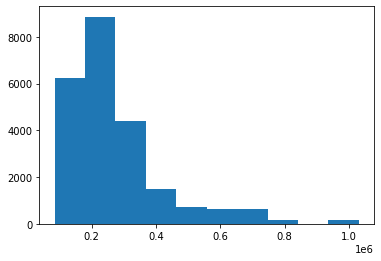

In [8]:
plt.hist(np.exp(train_data.price_per_ring))

In [9]:
print(len(test_data[test_data.seller == test_data.area_total]))

test_data.price_per_ring#print((test_data.loc[np.isnan(test_data.price_per_ring)].loc[test_data.dist_from_city_center < b.index[0].right]).head(3))
test_data.price_per_ring[(np.isnan(test_data.price_per_ring)) & (test_data.dist_from_city_center < b.index[0].right)] = b[0]
test_data.price_per_ring[(np.isnan(test_data.price_per_ring)) & (test_data.dist_from_city_center > b.index[len(b)-1].left)] = b[len(b)-1]


#print(np.sum(np.sum(np.isnan(test_data.price_per_ring))))

0


C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
from tensorflow.keras.losses import mean_squared_logarithmic_error
from tensorflow.keras.backend import sqrt

def root_mean_squared_log_error(y_true, y_pred):
    return sqrt(mean_squared_logarithmic_error(y_true, y_pred))

In [11]:
train_data = train_data.sort_values(by = "price")
x_val = train_data.iloc[::10, :]
train_data = train_data.drop(x_val.index)
x_train = train_data.sort_index()

y_train = x_train.price
y_val = x_val.price




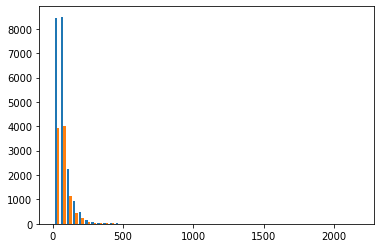

In [12]:
a = plt.hist([train_data.area_total, test_data.area_total], 50)

C:\Users\Moritz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


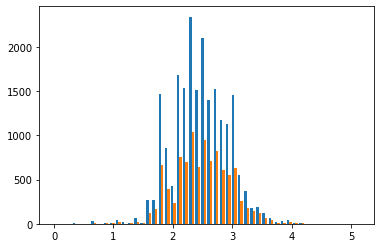

In [13]:
a = plt.hist([np.log(train_data.area_kitchen), np.log(test_data.area_kitchen)], 50)

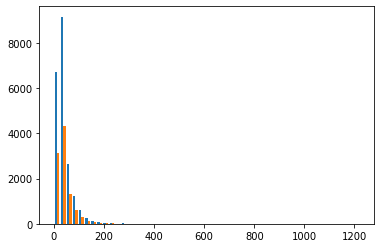

In [14]:
a = plt.hist([train_data.area_living, test_data.area_living], 50)

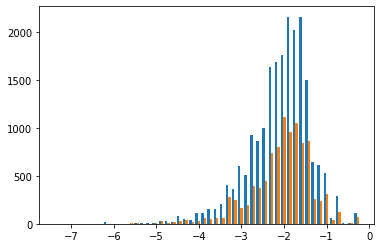

In [15]:
a = plt.hist([np.log(train_data.dist_from_city_center), np.log(test_data.dist_from_city_center)], 50)

In [16]:
#a = plt.hist([np.log(train_data.price_per_ring), np.log(test_data.price_per_ring)], 50)


Index(['seller', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms',
       'ceiling', 'condition', 'building_id', 'district', 'constructed',
       'material', 'stories', 'parking', 'street_and_address', 'bathrooms',
       'dist_from_city_center', 'balconies_and_loggias', 'relative_story',
       'price', 'price_per_ring'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x18f0c068d30>,
 'caps': [<matplotlib.lines.Line2D at 0x18f0c0762e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f0c0689e8>],
 'medians': [<matplotlib.lines.Line2D at 0x18f0c076898>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f0c076b70>],
 'means': []}

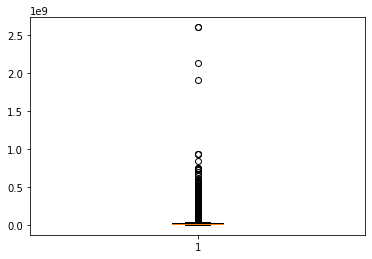

In [17]:
print(train_data.keys())
plt.boxplot(train_data.price)

In [18]:
#a = plt.boxplot((test_data.ceiling))
#plt.scatter(y_train, train_data.ceiling)
#print((test_data.loc[test_data.ceiling > 10]))
print((train_data.loc[train_data.ceiling > 10]))

Empty DataFrame
Columns: [seller, area_total, area_kitchen, area_living, floor, rooms, ceiling, condition, building_id, district, constructed, material, stories, parking, street_and_address, bathrooms, dist_from_city_center, balconies_and_loggias, relative_story, price, price_per_ring]
Index: []

[0 rows x 21 columns]


In [19]:
#print(len(test_data[test_data.bathrooms < 1]))
#a = plt.hist([(train_data.price_per_ring), (test_data.price_per_ring)])

#print(train_data[train_data.floor > train_data.stories])
#print(test_data[test_data.ceiling < 1])

#plt.scatter(train_data.price, train_data.constructed)


#print(train_data[train_data.price > 2000000000])

In [20]:
print(x_train.head())

x_train = x_train.drop(["price", "building_id"], axis = 1)
x_val = x_val.drop(["price", "building_id"], axis = 1)


x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

   seller  area_total  area_kitchen  area_living  floor  rooms   ceiling  \
1     3.0        88.0          14.2         48.0   18.0    3.0  3.073400   
2     3.0        78.5          22.5         40.8   12.0    3.0  2.650000   
3     3.0        88.0          14.0         48.0   18.0    3.0  3.072361   
5     3.0        36.0           5.8         21.6    1.0    2.0  2.650000   
6     3.0        38.5           7.4         18.9   17.0    1.0  2.779206   

   condition  building_id   district  ...  material  stories  parking  \
1        3.0         1893  12.226539  ...       3.0     25.0      1.0   
2        1.0         5176  12.378552  ...       3.0     15.0      1.0   
3        2.0         1893  12.226539  ...       3.0     25.0      1.0   
5        1.0         4162  12.019032  ...       3.0      9.0      1.0   
6        2.0         7737  11.837343  ...       3.0     17.0      1.0   

   street_and_address  bathrooms  dist_from_city_center  \
1              9050.0        2.0             

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print(len(train_data))
#x_train, x_val, y_train, y_val = train_test_split(train_data, y_train, train_size = 0.8, random_state = 1)#, stratify=np.log(y_train))
y_train = np.log(y_train)

#print(np.sum(y_train))
#print(len(x_train))


20956


In [22]:

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
#    min_samples_split=2,
#    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, ElasticNet, RidgeCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor


model5 = LGBMRegressor(
    num_leaves=25,
    max_depth=50, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=-2, 
    n_estimators=2000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.1
)

model_xgb = XGBRegressor(n_estimators=1500, max_depth=10, n_jobs=-2, booster='gbtree')

model_cat = CatBoostRegressor(iterations=2000,  depth=7,  learning_rate=0.15, l2_leaf_reg=0.45, silent=True)

#model_knn_256 = KNeighborsRegressor(n_neighbors=256)
model_knn_512 = KNeighborsRegressor(n_neighbors=512)
#model_knn_1024 = KNeighborsRegressor(n_neighbors=1024, p=1, n_jobs=-1)

'''final_model = LGBMRegressor(
    num_leaves=5,
    max_depth=7, 
    random_state=42069, 
    silent=True, 
    metric='mse',
    n_jobs=-2, 
    n_estimators=200,
    colsample_bytree=1,
    subsample=0.9,
    learning_rate=0.05
)'''
final_model = RidgeCV()


base_learners = [
    ('xgb_tree', model_xgb),
    ("random_forest", model2),
    ("lgbm", model5),
    # ('knn_256', model3),
    #('knn_512', model_knn_512),
    # ('knn_1024', model5),
    ('catboost', model_cat)
]

stacking_model = StackingRegressor(estimators=base_learners, n_jobs=-2, final_estimator=final_model)


In [24]:
stacking_model.fit(x_train, y_train)

In [ ]:

print(x_val.shape)
predictions_val = np.exp(stacking_model.predict(x_val))
print(root_mean_squared_log_error(y_val, predictions_val))
#importances = stacking_model.feature_importances_
#forest_importances = pd.Series(importances, index=train_data.columns[0:19])

#print(forest_importances)

#fig, ax = plt.subplots()
#forest_importances.plot.bar(ax=ax)
#ax.set_title("MDI or Gini Importance")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

(2329, 19)
tf.Tensor(0.1253192744371806, shape=(), dtype=float64)


In [ ]:
test_data = test_data.drop("building_id", axis = 1)

prediction = stacking_model.predict(np.asarray(test_data))
prediction = np.exp(prediction)
submission = pd.DataFrame()
submission['id'] = test_ids
submission["price_prediction"] = prediction
submission.to_csv('simple_nn_submission.csv', index=False)